# Example 1

This notebook will give a quick example on how to download and process Kik-Net downhole array motions.

In [1]:
import datools

### Step 0: Access Kik-Net's website and download your motions

I made a video outlining how you can do this: https://www.youtube.com/watch?v=zvhaZqRpw3w

### Step 1: Break your .tar files (downloaded directly from Kik-Net) into ASCII files

In [2]:

datools.signal_processing.grabASCIIs(tarfile_path = "data/example_kik.tar" , exdir="data/example_kik")


### Step 2: Construct a Stream from your directory

I am only going to look at the surface horizontal component in the East/West direction ("EW2").
You can use any extension you would like however.

In [5]:
st = datools.signal_processing.genstream("data/example_kik","EW2")

### Step 3: Linear Detrend and Demean

Attempting to remove bias: the code subtracts the mean (average) of the data from each individual data point first. It then removes a straight line fit from each point in the data.

$$
\text{Demeaned } x_i = x_i - \bar{x}, \quad \text{where } \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

$$
\text{Detrended } y_i = y_i - \hat{y}_i, \quad \text{where } \hat{y}_i = a + b t_i
$$

In [7]:
st = datools.signal_processing.detrend_demean(st)

### Step 3.1: Plot your Streams

You can also plot velocities w/ plotstream_vels()

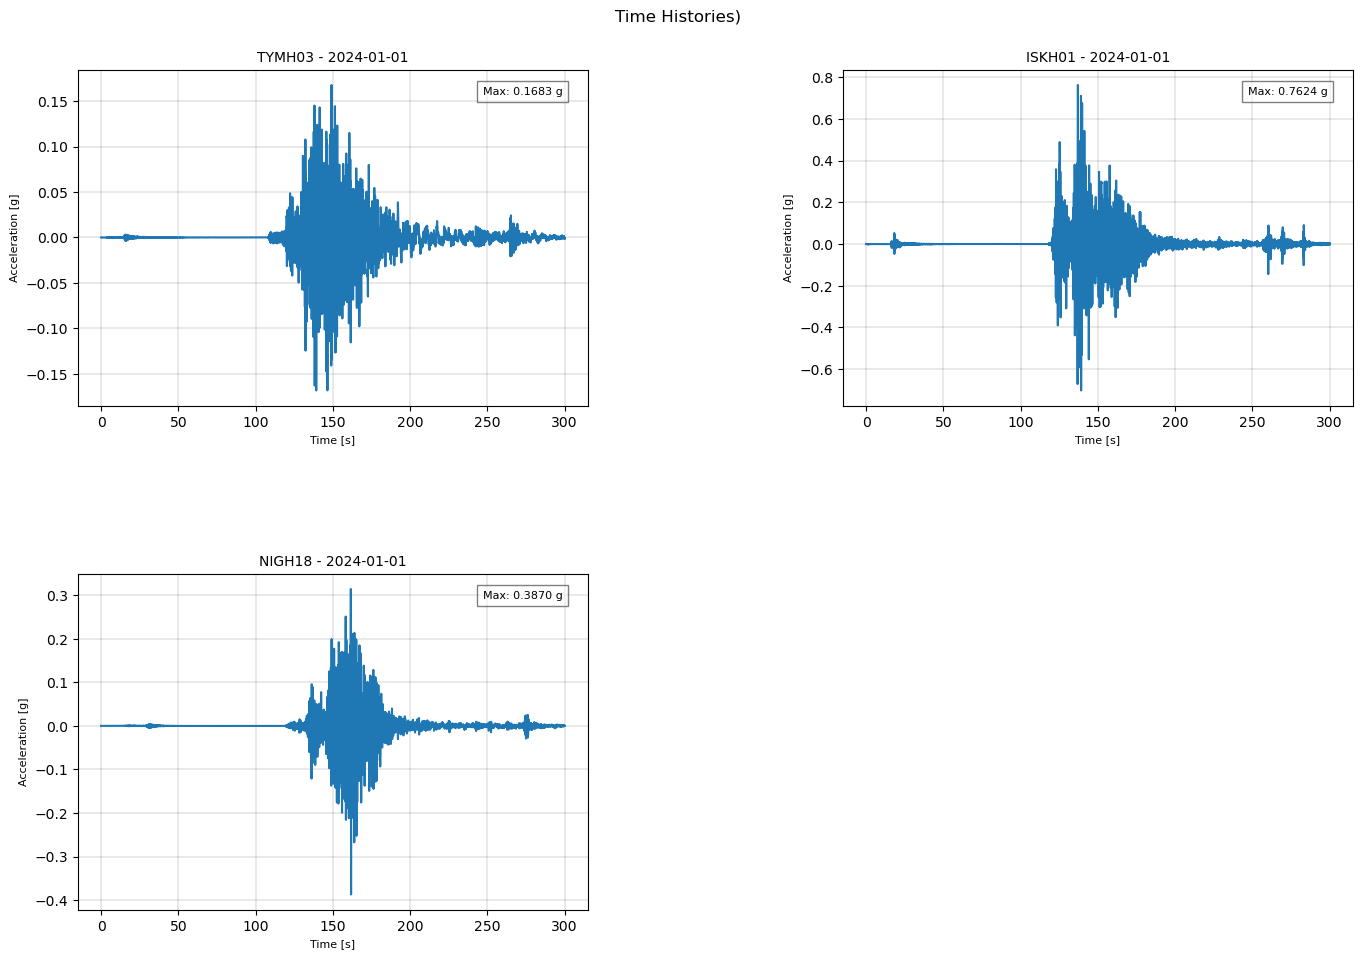

In [8]:
datools.signal_processing.plotstream(st)

### Step 4: Trim motions

This code uses the Recursive STA/LTA algorithm to find an estimate for the beginning of the signal

Source: (https://gfzpublic.gfz-potsdam.de/rest/items/item_4097/component/file_4098/content)

/Users/griffinberse/Documents/datools/src/datools/signal_processing.py:230: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trace_data = pd.concat([trace_data, new_row], ignore_index=True)


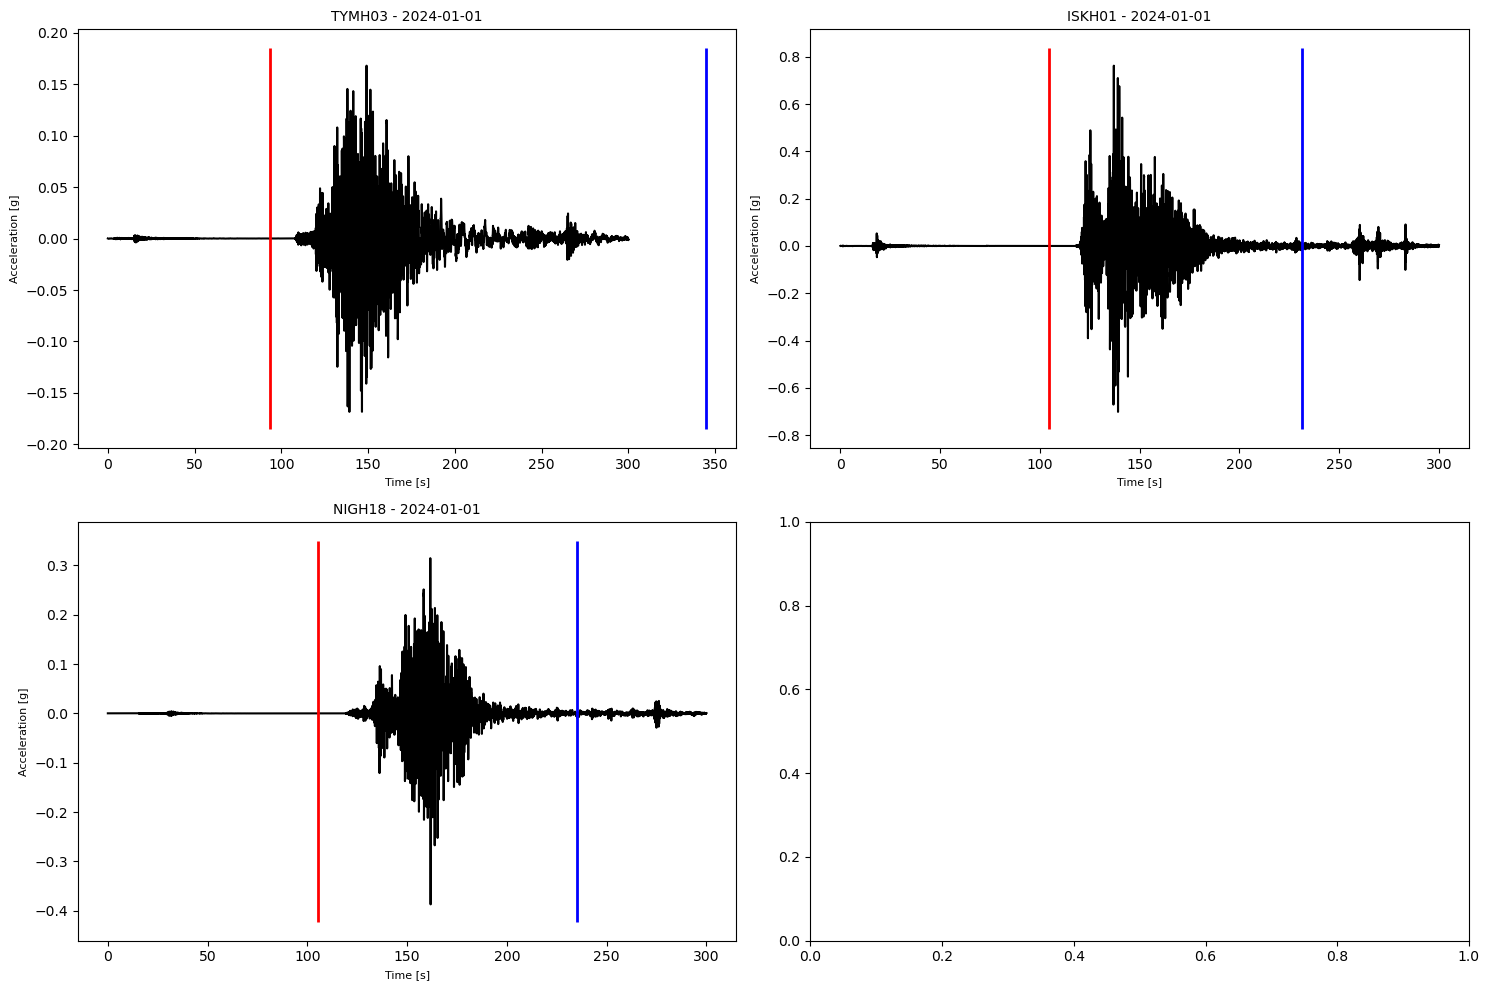

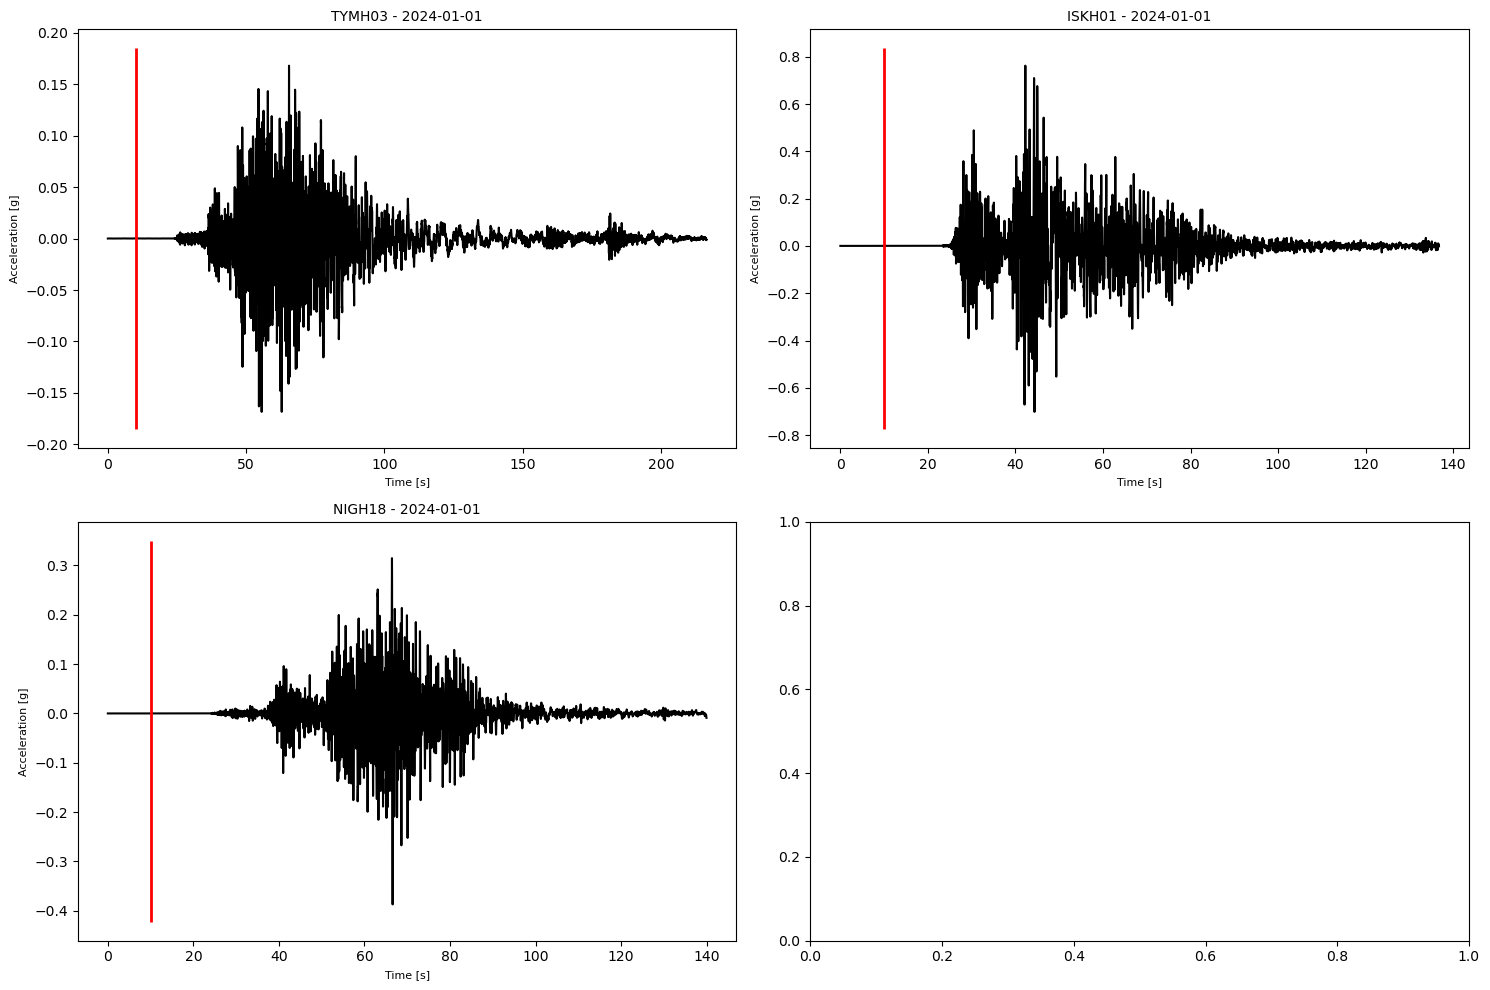

No traces without triggers to display.


In [12]:
new_st, trigger_data, no_trigger_stream = datools.signal_processing.narrowstream(st, 25, 45, 15)

**NOTE:** this finds a time 15s before the trigger (i.e., signal arrival estimate). In other words, we get 15 seconds of noise. We can always choose to have more or less.

### Step 5: Calculate the Signal to Noise Ratio

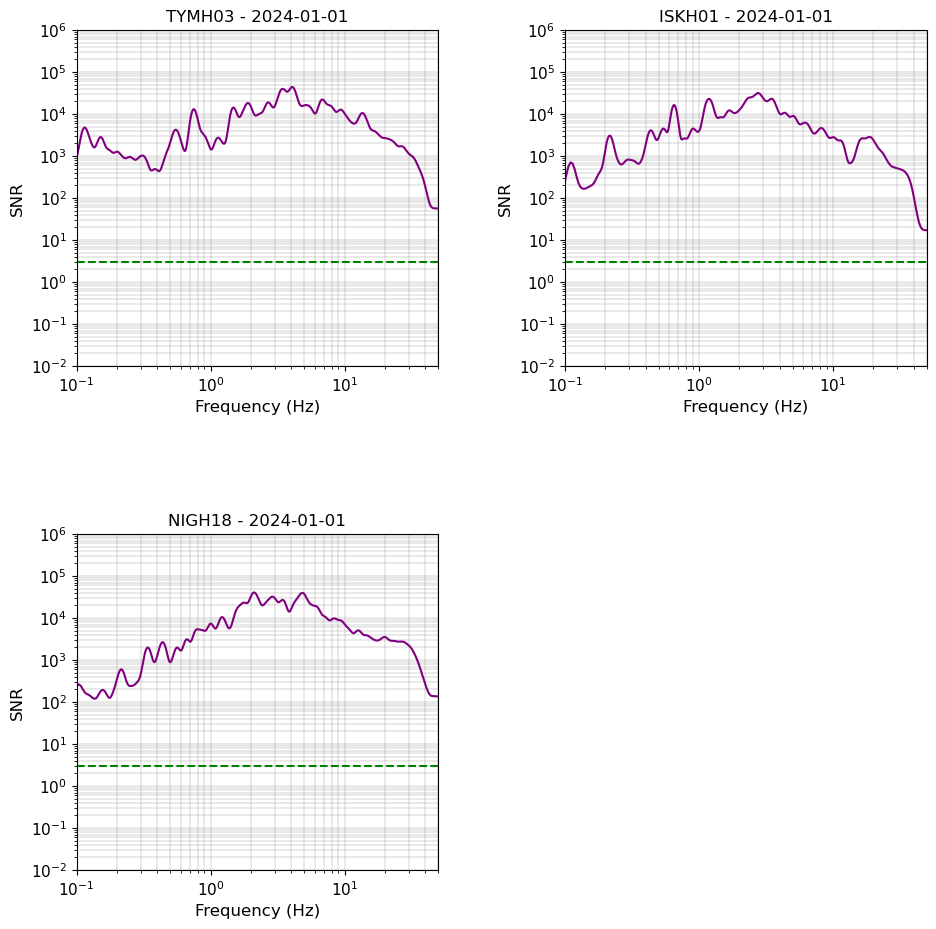

In [14]:
SNR_corner_freq = datools.signal_processing.snr(new_st, trigger_data)

These are relatively large motions ---> high SNR ratios. At no point is there a SNR < 3.

### Step 6: Calculate low and high pass frequency bounds for buttersworth filter

In addition to the SNR criteria, you can also use the "UCLA method" outlined in:
https://ascelibrary.org/doi/epdf/10.1061/9780784484692.034 (Ramos-Sepulveda 2023)

In [16]:
frequency_window = datools.signal_processing.corner_freq(new_st,SNR_corner_freq,0.0001)

/Users/griffinberse/Documents/datools/src/datools/signal_processing.py:739: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  window = window.fillna(value=np.nan)


In [17]:
frequency_window

,Site ID,Date,Trace Number,SNR=3 Frequencies (upper),SNR=3 Frequencies,SNR < 1,SNR < 3,UniqueID,UCLAhf,lf,corner_filter_frequency_hp,corner_filter_frequency_lp
0,TYMH03,2024-01-01T07:10:00.610000Z,1,NaN,0.0,No,Yes,TYMH032401011610.EW2,0.044452,40.0,0.044452,40.0
1,ISKH01,2024-01-01T07:09:46.790000Z,2,NaN,NaN,No,Yes,ISKH012401011610.EW2,0.032349,40.0,0.032349,40.0
2,NIGH18,2024-01-01T07:10:05.170000Z,3,NaN,0.0,No,Yes,NIGH182401011610.EW2,0.122050,40.0,0.122050,40.0


### Step 7: Apply Bandpass

In [18]:
filtered_st = datools.signal_processing.buttersworth(new_st, frequency_window,c=4)

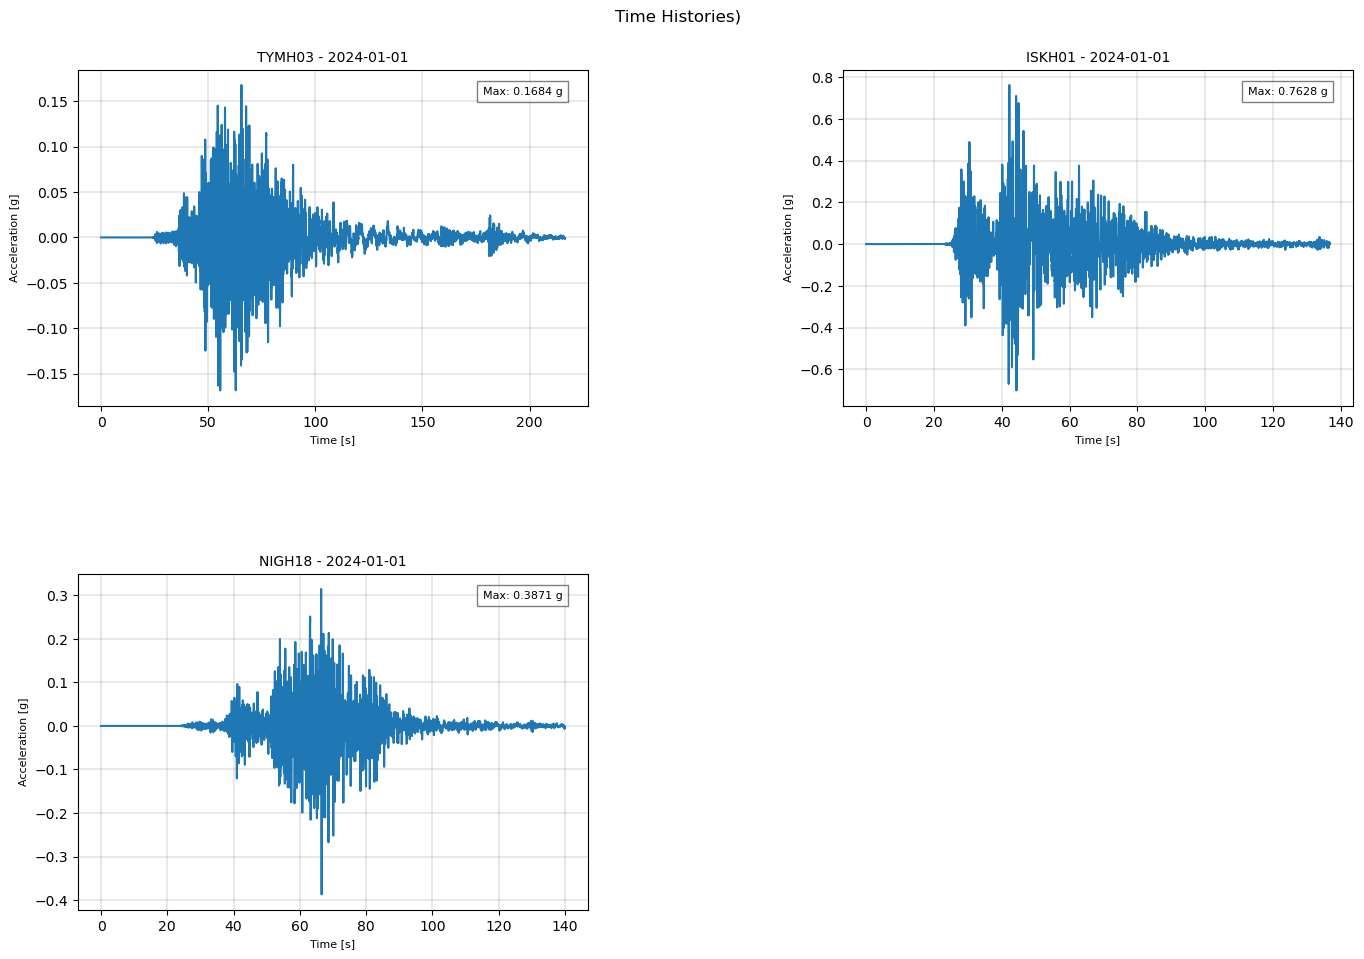

In [19]:
datools.signal_processing.plotstream(filtered_st)

### Step 8: Save filtered data

In [23]:
datools.signal_processing.save_seismic_data(filtered_st,base_path="data",
                                            station_code="EW2",
                                            dir_prefix = 'processed_sample_data'
                                            )

Saved data for station EW2 in 1 format(s) to:
  data/EW2/processed_sample_dataEW2
